# 🟩 나에게 맞는 커스텀 데이터셋 만들기  

<br>

## 🟢 커스템 데이터셋 클래스 만들기  

In [18]:
import torch  # 훈련
from torch.utils.data import Dataset, DataLoader  # 커스텀 데이터셋을 만들기 위함

# PIL(Pillow) 라이브러리의 Image: 파이썬에서 이미지를 불러오고 다룰 때 사용하는 기본적인 도구입니다.
from PIL import Image

class CustomData(Dataset):
    # path가 
    def __init__(self, path, transform):
        self.image_path = path 
        self.transform = transform 

    def __len__(self):
        # if (이미지수 == 라벨수) return 이미지 수
        return len(self.image_path)
        # __len__은 DataLoader가 전체 데이터 개수를 알기 위해 호출합니다.
    

    # 텐서 형태로 변환된 이미지를 돌려줌
    def __getitem__(self, idx):
        image = self.image_path[idx]
        # 지금 image 변수는 '파일 경로 문자열'입니다.
        # 예: image == "data/img_001.jpg"

        image = self.same_fps(image)

        image = Image.open(image)  # 해당 경로에서 이미지를 읽어 옴

        if self.transform is not None:
            result = self.transform(image)

        # csv,파일 이름 등을 이용해서 데이터에 맞는 라벨을 반환
        label = 1
        
        return result, label

<br>

## 🟢 path (동영상 경로)  

### 🟡 class별 동영상 path 지정 (`동영상별 path` list가 만듬)  

In [19]:
import os  # 로컬 컴퓨터에서 파일 및 폴더 컨트롤 라이브러리

origin = "C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\"

human_accident_class = os.listdir(origin)

video_path = []

for accident_class in human_accident_class:
    for x in os.listdir(origin + accident_class):
        video_path.append(os.path.join(origin, accident_class, x))

print(video_path)

['C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\bump\\human-accident_bump_rgb_0001_cctv1.avi', 'C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\bump\\human-accident_bump_rgb_0005_cctv2.avi', 'C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\bump\\human-accident_bump_rgb_0006_cctv2.avi', 'C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\bump\\human-accident_bump_rgb_0021_cctv2.avi', 'C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\bump\\human-accident_bump_rgb_0047_cctv3.avi', 'C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\bump\\human-accident_bump_rgb_0049_cctv4.avi', 'C:\\Users\\bb\\Desktop\\learn_deeplearning\\human-accident\\data\\safety-data\\human-accident\\bump\\human-accident_bump_rgb_0053_cctv4.avi'

<br>

## 🟢 transforms (전처리 방식)  

### 🟡 동영상 프레임 정보 가져오기 (CV2)  

In [20]:
import cv2

video_frame = []

for i in video_path:

    cap = cv2.VideoCapture(i)

    # 영상 속성 가져오기
    fps = int(cap.get(cv2.CAP_PROP_FPS))  # 동영상의 fps를 확인
    video_frame.append(fps)
    # print(f"fps : {fps}")
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # 동영상의 넓이 확인
    # print(f"width : {width}")
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # 동영상의 높이 확인
    # print(f"height : {height}")

video_frame_type = [x for x in tuple(set(video_frame))]

video_frame_type_count = {}
for i in video_frame_type:
    video_frame_type_count[i] = video_frame.count(i)

video_count = len(video_frame)

print(video_frame)
print("프레임 종류 파악: ", video_frame_type)
print(f"프레임 종류들 몇개? : {video_frame_type_count}")
print("= ", video_count, "개 동영상 존재")

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,

### 🟡 히스토그램 (그래프) - X축: 프레임 길이 | Y축:  비디오 갯수  

seaborn  
sns.hist 로 출력하기  

C:\Users\bb\AppData\Local\Temp\ipykernel_7356\2097253423.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
c:\Users\bb\Desktop\learn_deeplearning\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bb\Desktop\learn_deeplearning\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bb\Desktop\learn_deeplearning\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bb\Desktop\learn_deeplearning\.venv\Lib\site-packages\IPython\core\pylabtools.py

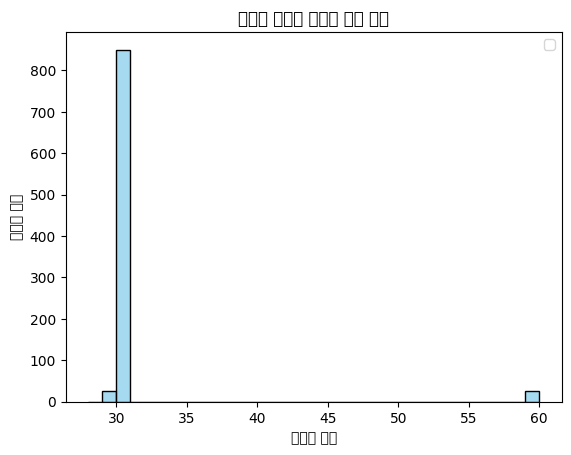

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt  # 이미지 시각화

# 히스토그램 그리기
sns.histplot(video_frame, bins=[28,29,30,31,59,60], kde=False, color="skyblue")

# 데이터 준비
# X축 프레임 길이 | Y축 비디오 갯수
# x = list(video_frame_type_count.keys())  # [59, 29, 30]
# y = list(video_frame_type_count.values())  # [25, 25, 850]

# 그래프 그리기
# plt.plot(x, y, marker=".", linestyle="", color="skyblue", label="y = 2x")

# 축 이름 붙이기
plt.xlabel("프레임 길이")
plt.ylabel("비디오 개수")
plt.title("프레임 길이별 비디오 개수 분포")

# 범례 추가
plt.legend()

# 화면에 출력
plt.show()

### 🟡 각각의 Video마다 FPS 통일하기  
- 900개 영상을 읽어서 → 프레임 추출 → 전처리 후 → 하나의 넘파이 배열로 합쳐야 합니다.  

<br>

- 커스텀 데이터셋 클래스에 비디오를 통일시키는 함수가 하나 더 들어가야합니다.  
    - 30fps를 그대로 할 것입니다.  
    - 30fps가 아닌 경우에는 처리하는 함수가 필요하다  
        - 29프레임의 경우 1개 차이이기 때문에 마지막 프레임을 복붙하는 방식으로 하고,  
        - 59프레임은 줄이면 된다. 줄이는 것은 문제가 되지 않습니다.  
            - 59프레임은 중간중간 프레임을 뺀다면 "60 / 2"를 한다는 생각으로 중간중간 29프레임을 빼주면 30fps이 남을 것입니다.  

- 마지막으로 프레임을 확인하고 통일 처리하는 함수를 'class `__getitem__`' 에 넣어준다.  

#### ⚫ 참고 사이트  

- https://velog.io/@johaun12/Python-%EC%98%81%EC%83%81-%EB%98%90%EB%8A%94-%EC%9B%B9%EC%BA%A0%EC%97%90%EC%84%9C%EC%9D%98-%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%A5%BC-%ED%94%84%EB%A0%88%EC%9E%84-%EB%8B%A8%EC%9C%84%EB%A1%9C-%EC%9E%90%EB%A5%B4%EA%B8%B0  

- 


In [22]:
# 임시 확인 code

import cv2

video = cv2.VideoCapture(video_path[3])  # for문 안에 넣어서 하나씩 가져와야합니다.
if not video.isOpened():
    print("Could not Open :", video_path)
    exit(0) # 파이썬 인터프리터 자체를 종료

fps = video.get(cv2.CAP_PROP_FPS)
print(f"{type(fps)}")
print(f"초당 프레임 수 : {fps}")

length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))  
# CAP_PROP_FRAME_COUNT를 통해 뭘 알 수 있지? 무엇을 count 하는 것인가?
#   = 총 '프레임의 수' 입니다.
print(f"총 프레임 수 : {length}")

frame_location = int(video.get(cv2.CAP_PROP_POS_FRAMES))
print(f"몇번째 프레임인지 나오느가??? : {frame_location}")

width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

<class 'float'>
초당 프레임 수 : 30.0
총 프레임 수 : 328
몇번째 프레임인지 나오느가??? : 0


#### ⚫ 여기서 내각 생각했던 것  

- read()했을 때 이 프레임이 몇번째 인지에 대한 것인지가 나온다면   
    - 30fps이라면 continue  


    - 29라면 뒤에 29번째 프레임 복붙  
        

    - 59 프레임이라면 홀수 프레임 다 날려버리기  

- 그 다음 원본 영상을 바꿔버린다?  

In [23]:
# # 전체 path 리스트를 for문 안에 넣어서 하나씩 가져와야합니다.
# # 커스텀데이터셋 class에 들어간다고 했을 때 받아오는 인수가 "전체 path 리스트"입니다.

# count = 0

# for i in video_path:
#     # ------------------------------------------------
#     video = cv2.VideoCapture(i)
#     if not video.isOpened():    # 비디오가 없다면 넘어가라
#         print("Could not Open :", i)
#         continue

#     fps = int(video.get(cv2.CAP_PROP_FPS))   # 초당 프레임 수
#     print(f"{type(fps)}")
#     print(f"초당 프레임 수 : {fps}")

#     length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))  # 총 '프레임의 수'
#     print(f"총 프레임 수 : {length}")

#     # width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
#     # height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

#     # ------------------------------------------------
#     # 일단 먼저 영상을 읽어와야겠지??? 라고 생각했는데 아니다. 계속 읽어오지 않기 때문이다.
#     # # video.read()는 bool, img(한장의 프레임 이미지)를 반환하며, 한 번 호출할 때마다 딱 한 장의 프레임만 읽어온다. 그래서 반복문과 함께 사용해야합니다.
#     # ret, img = video.read()
#     # print(f"img type : {type(img)}")    # (numpy.ndarray)
#     # print(f"image 형태 : {img}")        # (height, width, 3)  3은 RGB를 나타냅니다.

#     # if ret == False:
#     #     # Return value (불리언(bool) 값)을 가지고 False(없다면)이면 넘어가라
#     #     continue

#     # 나는 일단 이렇게 까지 할 필요가 없어보입니다.
#     # if(int(video.get(1)) % int(fps) == 0): # get an image for each seconds
#     #     tm = localtime()
#     #     capturedtime = strftime('%Y%m%d_%H%M%S_', tm)
#     #     cv2.imwrite(f'images/{timestamp}/{capturedtime}{str(int(video.get(1)))}.jpg', img)
#     #     data = {"image": img, "filename" : f"{capturedtime}{str(int(video.get(1)))}"}
#     #     print("Saved frame number:" , str(int(video.get(1))))
#     #     count += 1
#     #     yield data

#     # 🔥🔥🔥🔥🔥 지금부터의 계산은 read()했을 때 이 프레임이 몇번째 인지에 대한 것인지가 나온다면 가능한 코드입니다.

#     # 30fps이라면 continue
#     if fps == 30:
#         continue

#     # 29라면 뒤에 29번째 프레임 복붙
#     # if fps > 30:
#     if fps == 29:    # Hard Coding ?
#         print(f"나는 29fps !!")
#         while(True):
#             # video.read()는 bool, img(한장의 프레임 이미지)를 반환하며, 한 번 호출할 때마다 딱 한 장의 프레임만 읽어온다. 그래서 반복문과 함께 사용해야합니다.
#             ret, img = video.read()  
#             # print(f"img type : {type(img)}")    # (numpy.ndarray)
#             # print(f"image 형태 : {img}")        # (height, width, 3)  3은 RGB를 나타냅니다.

#             if ret == False:  
#                 # Return value (불리언(bool) 값)을 가지고 False(없다면)이면 넘어가라
#                 break

#             frame_location = int(video.get(cv2.CAP_PROP_POS_FRAMES))
#             print(f"현재 {frame_location}번째 프레임")

#     # 59 프레임이라면 홀수 프레임 다 날려버리기
#     # if fps < 30:
#     if fps == 59:    # Hard Coding ?
#         print(f"나는 59fps!!")
#         while True:
#             # video.read()는 bool, img(한장의 프레임 이미지)를 반환하며, 한 번 호출할 때마다 딱 한 장의 프레임만 읽어온다. 그래서 반복문과 함께 사용해야합니다.
#             ret, img = video.read()
#             # print(f"img type : {type(img)}")  # (numpy.ndarray)
#             # print(f"image 형태 : {img}")  # (height, width, 3)  3은 RGB를 나타냅니다.

#             if ret == False:
#                 # Return value (불리언(bool) 값)을 가지고 False(없다면)이면 넘어가라
#                 break

#             frame_location = int(video.get(cv2.CAP_PROP_POS_FRAMES))
#             print(f"현재 {frame_location}번째 프레임")

#     # -----------------------------------------------------------
#     # 코드 테스트 시 임시 1번만하고 종료시키려고 만들어 놓음.
#     count += 1

#     if count == 1:
#         exit(0)
#         break


# video.release()

#### ⚫ 다르게 생각하기  

- FPS가 높은 영상(59FPS)  
    - 목표 FPS < 원본 FPS → 프레임 일부 제거  
    - 매 round(original_fps / target_fps) 간격으로 프레임 선택  

- FPS가 낮은 영상(29FPS)  
    - 목표 FPS > 원본 FPS → 프레임 복제  
    - 간단한 방법: 마지막 프레임 복제해서 늘리기  

In [24]:
import cv2
import numpy as np

# 모든 path를 넣기 위한 for문이 아닌 임시 한개의 path만을 사용합니다.

# 1. 영상 열기
where_index = video_frame.index(59)

# video = cv2.VideoCapture(video_path[14])
video = cv2.VideoCapture(video_path[where_index])
if not video.isOpened():
    print("Could not Open :", i)
    # continue

target_fps = 30

original_fps = int(video.get(cv2.CAP_PROP_FPS))  # 초당 프레임 수 / 원본 영상 FPS 확인
print(f"현재 초당 프레임 수 : {original_fps}")

frame_length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))  # 총 '프레임의 수'
print(f"현재 총 프레임 수 : {frame_length}")

frames = []  # 🔥🔥🔥 하나의 img를 지속적으로 저장할 공간입니다.
count = 0  # 현재 읽은 프레임 수 카운트

while True:
    ret, img = video.read()  # 한 프레임 읽기
    if not ret:  # 더 이상 프레임 없으면 종료
        break

    # 🔥🔥🔥 FPS가 원본보다 높으면 (예: 59FPS → 30FPS) 중간중간 일부 제거하여 30fps에 맞추기
    if original_fps > target_fps:
        step = round(original_fps / target_fps)  # 몇 프레임마다 1개 선택할지 결정
        if count % step == 0:  # step 간격마다 프레임 저장
            frames.append(img)

    # 🔥🔥🔥 FPS가 원본보다 낮으면 (예: 29FPS → 30FPS) 29프레임마다 29번째 프레임 1개를 복제하여 추가하기
    elif original_fps < target_fps:
        frames.append(img)  # 원래 프레임 저장

        # 현재 프레임의 위치가 특정 간격일 때 복제 프레임 추가
        # 29fps → 30fps라면, 약 29프레임마다 1장을 추가
        if (count + 1) % original_fps == 0:
            frames.append(img)  # 마지막 프레임을 한 장 더 저장

    # 🔥🔥🔥 FPS가 목표와 같으면 그대로 저장 ---
    else:
        frames.append(img)

    count += 1  # 읽은 프레임 수 증가

video.release()  # 영상 닫기

# numpy 배열로 변환 (num_frames, H, W, C)
print("조정 후 총 프레임 수:", len(frames))

# return np.array(frames))

현재 초당 프레임 수 : 59
현재 총 프레임 수 : 761
조정 후 총 프레임 수: 381


In [ ]:
import cv2
import numpy as np

def same_fps(video_path):
    for i in video_path:
        # 영상 열기
        video = cv2.VideoCapture(i)  # 🔥🔥🔥 OpenCV가 ndarray로 읽어들어옵니다.
        if not video.isOpened():
            print("Could not Open :", i)
            continue

        target_fps = 30

        original_fps = int(video.get(cv2.CAP_PROP_FPS))  # 초당 프레임 수 / 원본 영상 FPS 확인
        print(f"현재 초당 프레임 수 : {original_fps}")

        frame_length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))  # 총 '프레임의 수'
        print(f"현재 총 프레임 수 : {frame_length}")

        # 🔥🔥🔥 frames는 하나의 ndarray type인 img를 지속적으로 저장할 공간입니다.
        frames = []  
        count = 0  # 현재 읽은 프레임 수 카운트

        while True:
            ret, img = video.read()  # 한 프레임 읽기
            if not ret:  # 더 이상 프레임 없으면 종료
                break

            # 🟩 따로 라이브러리 함수가 존재하지 않기 때문에 파이썬 함수로 직접 코딩해줘야합니다.
            # 🔥 FPS가 원본보다 높으면 (예: 59FPS → 30FPS) 중간중간 일부 제거하여 30fps에 맞추기
            if original_fps > target_fps:
                step = round(original_fps / target_fps)  # 몇 프레임마다 1개 선택할지 결정
                if count % step == 0:  # step 간격마다 프레임 저장
                    frames.append(img)

            # 🔥 FPS가 원본보다 낮으면 (예: 29FPS → 30FPS) 29프레임마다 29번째 프레임 1개를 복제하여 추가하기
            elif original_fps < target_fps:
                frames.append(img)  # 원래 프레임 저장

                # 현재 프레임의 위치가 특정 간격일 때 복제 프레임 더 추가
                # 29fps → 30fps라면, 약 29프레임마다 1장을 추가
                if (count + 1) % original_fps == 0:
                    frames.append(img)  # 마지막 프레임을 한 장 더 저장

            # 🔥 FPS가 목표와 같으면 그대로 저장 ---
            else:
                frames.append(img)

            count += 1  # 읽은 프레임 수 증가

        video.release()  # 영상 닫기
        # - 끝 -

        # ------------------------------------------------------------------------
        # 데이터 확인하기
        print("현재 가져온 video type :", type(np.array(video)))    # 처음부터 해당 path의 영상을 ndarray로 가져온 것.
        print("만들어진 'frames' type :", type(np.array(frames)))  # 새롭게 만들어진 것 또한 ndarray.
        # 완성된 frames를 확인합니다. ndarray 형태입니다. (num_frames, H, W, C)
        
        print("조정 후 총 프레임 수 :", len(frames))
        print("완성된 frames 확인 :", frames)

        return 


same_fps(video_path)

현재 초당 프레임 수 : 30
현재 총 프레임 수 : 393
video type : <class 'numpy.ndarray'>
frames type : <class 'numpy.ndarray'>
조정 후 총 프레임 수 : 393
완성된 frames 확인 : [array([[[114, 116, 109],
        [ 96,  98,  91],
        [ 76,  78,  71],
        ...,
        [123, 134, 128],
        [115, 126, 120],
        [105, 116, 110]],

       [[114, 116, 109],
        [ 96,  98,  91],
        [ 76,  78,  71],
        ...,
        [ 73,  84,  78],
        [117, 128, 122],
        [137, 148, 142]],

       [[114, 116, 109],
        [ 96,  98,  91],
        [ 76,  78,  71],
        ...,
        [  3,  13,  10],
        [ 46,  56,  53],
        [ 91, 101,  98]],

       ...,

       [[ 89,  83,  78],
        [ 63,  57,  52],
        [ 39,  33,  28],
        ...,
        [ 74,  82,  81],
        [ 41,  49,  48],
        [ 13,  21,  20]],

       [[ 89,  83,  78],
        [ 63,  57,  52],
        [ 39,  33,  28],
        ...,
        [ 69,  77,  76],
        [ 52,  60,  59],
        [ 22,  30,  29]],

       [[ 89,  83

KeyboardInterrupt: 

### 🟡 (마지막) 전처리 방법 정해주기  

In [ ]:
# 여러 가지 전처리 방법을 하나로 묶어주는 transforms.Compose를 사용합니다.

# torchvision: PyTorch에서 이미지 처리/데이터셋 관련 기능을 제공하는 라이브러리
# 🔥transforms(전처리): 이미지의 크기를 조절하거나, 딥러닝 모델이 이해할 수 있는 텐서(Tensor) 형태로 변환하는 등 (자르기, 회전, 텐서 변환, 정규화 등)
#                       이미지 전처리(preprocessing) 기능을 담당합니다.
from torchvision import transforms

transform = transforms.Compose(
    [
        # 1. 이미지 크기 조절: 모든 이미지의 크기를 224x224 픽셀로 맞춥니다.
        transforms.Resize((224, 224)),
        # 2. 텐서(Tensor)로 변환: 이미지를 딥러닝 모델이 계산할 수 있는 숫자 행렬(텐서)로 바꿉니다.
        transforms.ToTensor(),
        # 3. 정규화(Normalize): 이미지의 픽셀 값 범위를 조정하여 모델이 더 빠르고 안정적으로 학습하도록 돕습니다.
        #    아래 mean과 std 값은 ImageNet 데이터셋에서 미리 계산된 값으로, 보통 그대로 많이 사용합니다.
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

<br><br>

---

## 🟢 사용  

In [ ]:
# 이미지에 대한 경로, 일괄적으로 적용할 전처리 이 2가지를 인수로 넣어줌.
dataset = CustomData(video_path, transform)
# 🔥🔥🔥 어떻게 작용하는 것일까?


dataloader = DataLoader(
    dataset=dataset,  # 🔥🔥🔥 어떻게 작용하는 것일까?
    batch_size=25,
    shuffle=True,
    drop_last=False,  # 마지막에 남는 데이터도 사용합니다. (False: 버리지 않음)

    # time
)